In [ ]:
#July_12th_SVM_KNN_Breast_Cancer detection

In [5]:
import numpy as np# mathematical calculation
import pandas as pd# dataframe creation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv("BreastCancer.csv")

In [7]:
df=data.copy()
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [8]:
df["Class"].value_counts()

Class
0    458
1    241
Name: count, dtype: int64

In [9]:
df["Class"].value_counts(normalize=True)

Class
0    0.655222
1    0.344778
Name: proportion, dtype: float64

In [10]:
df["Cl.thickness"].value_counts()

Cl.thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64

In [11]:
df["Cell.size"].value_counts()

Cell.size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64

In [12]:
# preprocessing -- 
# missing value

In [13]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [15]:
df.describe()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [16]:
df1=df.dropna()

In [17]:
df1.shape

(683, 11)

In [18]:
X=df1.drop(["Id","Class"],axis=1)
#X=df1.drop(["Id","Class"],axis=0)
Y=df1["Class"]

In [19]:
X.head(2)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1


In [20]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=101,stratify=Y)

In [22]:
Y_train.value_counts(normalize=True)

Class
0    0.650183
1    0.349817
Name: proportion, dtype: float64

In [23]:
Y_test.value_counts(normalize=True)

Class
0    0.649635
1    0.350365
Name: proportion, dtype: float64

# SVM

In [24]:
# import SVR-- Regression
# impoort SVC--Classification

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
from sklearn.svm import SVC,SVR

SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

In [27]:
# we are using kernal=poly

In [28]:
svc_model=SVC(kernel="poly",degree=8,C=0.1,gamma=0.01,verbose=True)

# POLYNOMIAL KERNAL
In algebra the formula for polynomial 
2a*b3(it is the b cube)+4a(-9)-- a to the power -9
# here 3 is the degree of polynomial

In [29]:
svc_model.fit(X_train,Y_train)

[LibSVM]

SVC(C=0.1, degree=8, gamma=0.01, kernel='poly', verbose=True)

In [30]:
# training performance evaluation

In [31]:
Y_pred_train=svc_model.predict(X_train)

In [32]:
accuracy_score(Y_train,Y_pred_train)

0.989010989010989

In [33]:
#teasting evaluation

In [34]:
Y_pred_test=svc_model.predict(X_test)

In [35]:
accuracy_score(Y_test,Y_pred_test)

0.9562043795620438

In [36]:
confusion_matrix(Y_test,Y_pred_test)

array([[88,  1],
       [ 5, 43]], dtype=int64)

In [37]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        89
           1       0.98      0.90      0.93        48

    accuracy                           0.96       137
   macro avg       0.96      0.94      0.95       137
weighted avg       0.96      0.96      0.96       137



In [38]:
# we are using kernal=rbf--radial basial function

In [39]:
svc_model=SVC(kernel="rbf",degree=3,C=0.1,gamma=0.01)
svc_model.fit(X_train,Y_train)


SVC(C=0.1, gamma=0.01)

In [40]:
Y_pred_train=svc_model.predict(X_train)

In [41]:

print("accuracy score",accuracy_score(Y_train,Y_pred_train))
print("***********"*2)
print("classification report \n",classification_report(Y_train,Y_pred_train))
print("***********"*2)
print(confusion_matrix(Y_train,Y_pred_train))

accuracy score 0.9743589743589743
**********************
classification report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       355
           1       0.95      0.97      0.96       191

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546

**********************
[[346   9]
 [  5 186]]


In [42]:
Y_pred=svc_model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,Y_pred))
print("***********"*2)
print("classification report \n",classification_report(Y_test,Y_pred))
print("***********"*2)
print(confusion_matrix(Y_test,Y_pred))

accuracy score 0.948905109489051
**********************
classification report 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        89
           1       0.90      0.96      0.93        48

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137

**********************
[[84  5]
 [ 2 46]]


In [43]:
## we are using kernal=sigmoid--

In [44]:
svc_model=SVC(kernel="sigmoid",degree=3,C=1,gamma=0.01)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,Y_pred))
print("***********"*2)
print("classification report \n",classification_report(Y_test,Y_pred))
print("***********"*2)
print(confusion_matrix(Y_test,Y_pred))

accuracy score 0.40875912408759124
**********************
classification report 
               precision    recall  f1-score   support

           0       0.54      0.57      0.56        89
           1       0.12      0.10      0.11        48

    accuracy                           0.41       137
   macro avg       0.33      0.34      0.33       137
weighted avg       0.39      0.41      0.40       137

**********************
[[51 38]
 [43  5]]


In [45]:
X_cols=X[["Cl.thickness","Cell.size"]]

In [46]:
svc_model.fit(X_cols,Y)

SVC(C=1, gamma=0.01, kernel='sigmoid')

In [47]:
displ=DecisionBoundaryDisplay.from_estimator(svc_model,X_cols,response_method='predict',alpha=0.5,cmap=plt.cm.coolwarm)
displ.ax_.scatter(X_cols["Cl.thickness"],X_cols["Cell.size"],c=Y)

plt.title("SVC boundries")
plt.xlabel("Cl.thickness")
plt.ylabel("Cell.size")

NameError: name 'DecisionBoundaryDisplay' is not defined

In [48]:
svc_model=SVC(kernel="linear",degree=3,C=15,gamma=10,probability=True)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,Y_pred))
print("***********"*2)
print("classification report \n",classification_report(Y_test,Y_pred))
print("***********"*2)
print(confusion_matrix(Y_test,Y_pred))

accuracy score 0.9562043795620438
**********************
classification report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        48

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

**********************
[[86  3]
 [ 3 45]]


In [49]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [50]:
Y_test

181    0
322    0
475    0
647    0
266    1
      ..
607    0
209    0
646    0
13     0
39     1
Name: Class, Length: 137, dtype: int64

In [51]:
probability=svc_model.predict_proba(X_test)
probability

array([[9.98260968e-01, 1.73903237e-03],
       [9.90597849e-01, 9.40215058e-03],
       [9.94627684e-01, 5.37231634e-03],
       [9.97290363e-01, 2.70963659e-03],
       [4.36369863e-03, 9.95636301e-01],
       [9.96806105e-01, 3.19389477e-03],
       [9.90559641e-01, 9.44035864e-03],
       [9.75864583e-01, 2.41354166e-02],
       [9.96955710e-01, 3.04429033e-03],
       [1.41635711e-07, 9.99999858e-01],
       [9.95892805e-01, 4.10719543e-03],
       [9.87837920e-01, 1.21620799e-02],
       [9.78085534e-01, 2.19144663e-02],
       [3.92168804e-02, 9.60783120e-01],
       [9.90559641e-01, 9.44035864e-03],
       [3.20248063e-10, 1.00000000e+00],
       [9.98260968e-01, 1.73903237e-03],
       [9.78085534e-01, 2.19144663e-02],
       [9.92892589e-01, 7.10741076e-03],
       [9.96955710e-01, 3.04429033e-03],
       [9.63260806e-01, 3.67391942e-02],
       [1.39697564e-05, 9.99986030e-01],
       [1.37149479e-02, 9.86285052e-01],
       [9.75923797e-01, 2.40762032e-02],
       [9.975860

In [ ]:
# visualization of class and parameter effect on it

In [52]:
df1.head(2)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0


In [53]:
from sklearn.inspection import DecisionBoundaryDisplay

In [54]:
svc_model=SVC(kernel="rbf",degree=3,C=100,gamma=1,probability=False)

In [55]:
X_cols=X[["Cl.thickness","Cell.size"]]

In [56]:
svc_model.fit(X_cols,Y)

SVC(C=100, gamma=1)

Text(0, 0.5, 'Cell.size')

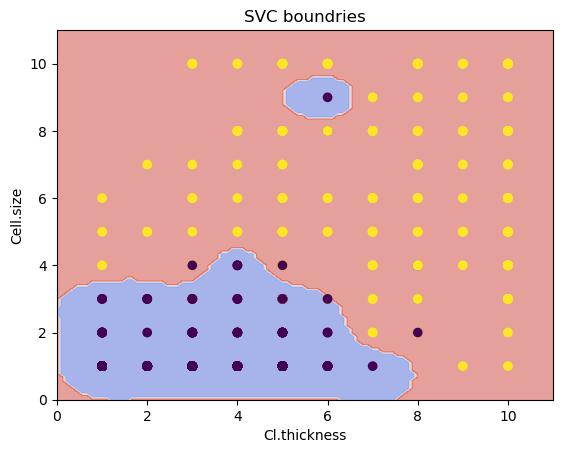

In [57]:
displ=DecisionBoundaryDisplay.from_estimator(svc_model,X_cols,response_method='predict',alpha=0.5,cmap=plt.cm.coolwarm)
displ.ax_.scatter(X_cols["Cl.thickness"],X_cols["Cell.size"],c=Y)

plt.title("SVC boundries")
plt.xlabel("Cl.thickness")
plt.ylabel("Cell.size")

In [ ]:
Hard Margin vs. Soft Margin

The difference between a hard margin and a soft margin in SVMs lies in the separability of the data. 
If our data is linearly separable, we go for a hard margin. However, if this is not the case, 
it won’t be feasible to do that. In the presence of the data points that make it impossible to find a
linear classifier, we would have to be more lenient and let some of the data points be misclassified.
In this case, a soft margin SVM is appropriate.

Sometimes, the data is linearly separable, but the margin is so small that the model becomes prone to
overfitting or being too sensitive to outliers. Also, in this case, we can opt for a larger margin by
using soft margin SVM in order to help the model generalize better.

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [24]:
# MODEL EVALUATION FUNCTIONS
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# finding the best value of k

Text(0.5, 0, 'k value')

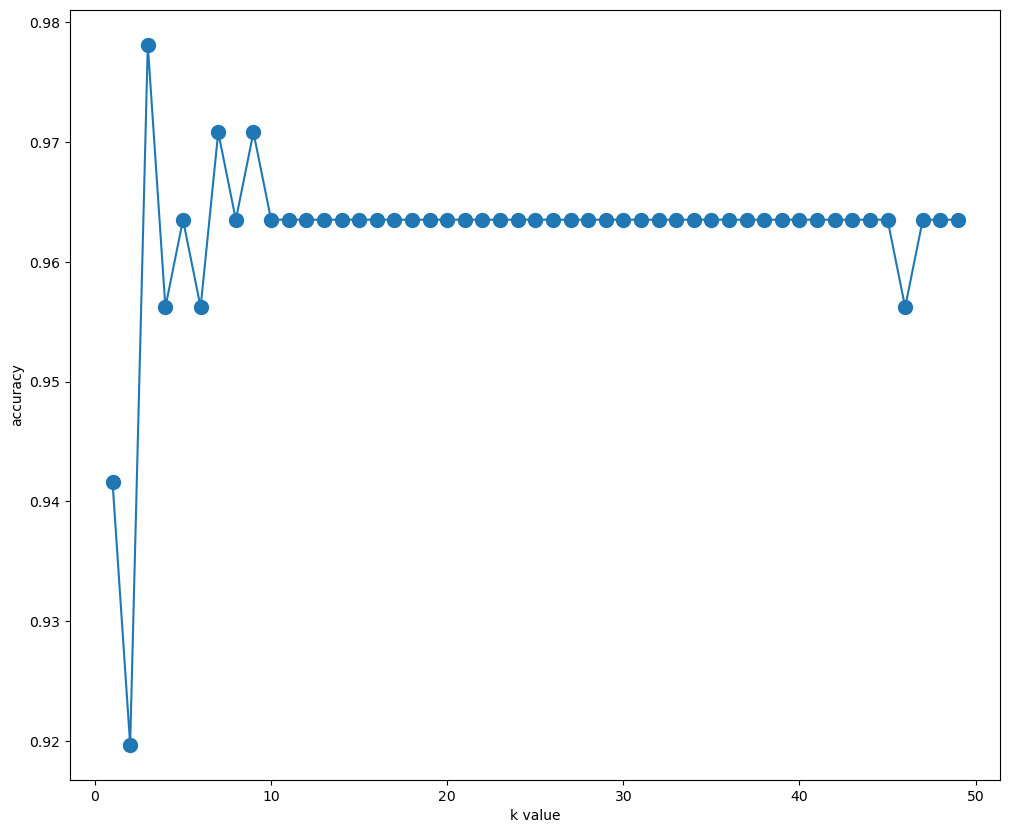

In [25]:
best_accuracy=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    best_accuracy.append(accuracy)
    
plt.figure(figsize=(12,10))
plt.plot(range(1,50),best_accuracy,marker="o",markersize=10)
plt.ylabel("accuracy")
plt.xlabel("k value")


In [ ]:
# best k value can be 7 or 9

In [26]:
knn=KNeighborsClassifier(n_neighbors=9)


In [27]:
knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=9)

In [28]:
Y_pred_train=knn.predict(X_train)

In [29]:
Y_pred_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [30]:
Y_train

302    1
19     0
654    0
390    0
265    0
      ..
97     0
277    0
86     1
118    0
480    0
Name: Class, Length: 546, dtype: int64

In [31]:
accuracy_train=accuracy_score(Y_train,Y_pred_train)

In [32]:
accuracy_train

0.9743589743589743

In [33]:
confusion_matrix(Y_train,Y_pred_train)

array([[349,   6],
       [  8, 183]], dtype=int64)

In [ ]:
# to solve the error, we should do hyper parameter tunning 

In [34]:
Y_pred_test=knn.predict(X_test)


In [35]:
accuracy_test=accuracy_score(Y_test,Y_pred_test)

In [36]:
accuracy_test

0.9708029197080292

In [37]:
confusion_matrix(Y_test,Y_pred_test)

array([[87,  2],
       [ 2, 46]], dtype=int64)

In [38]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        48

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



In [39]:
Y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [40]:
probability=knn.predict_proba(X_test)
probability

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.11111111, 0.88888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [49]:
X_cols=X[["Cl.thickness","Cell.size"]]

In [50]:
knn100=KNeighborsClassifier(n_neighbors=3)

In [52]:
knn100.fit(X_cols,Y)

KNeighborsClassifier(n_neighbors=3)

In [53]:
from sklearn.inspection import DecisionBoundaryDisplay

Text(0, 0.5, 'Cell.size')

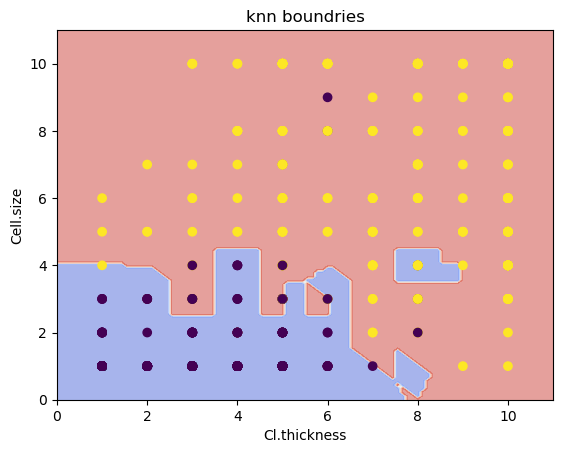

In [54]:
displ=DecisionBoundaryDisplay.from_estimator(knn100,X_cols,response_method='predict',alpha=0.5,cmap=plt.cm.coolwarm)
displ.ax_.scatter(X_cols["Cl.thickness"],X_cols["Cell.size"],c=Y)

plt.title("knn boundries")
plt.xlabel("Cl.thickness")
plt.ylabel("Cell.size")

In [55]:
from sklearn.metrics import roc_curve,roc_auc_score

In [56]:
pos_probability=knn.predict_proba(X_test)[:,1]
AUC_score=roc_auc_score(Y_test,pos_probability)
AUC_score

0.9882958801498127

In [57]:
fpr,tpr,threshold=roc_curve(Y_test,pos_probability)

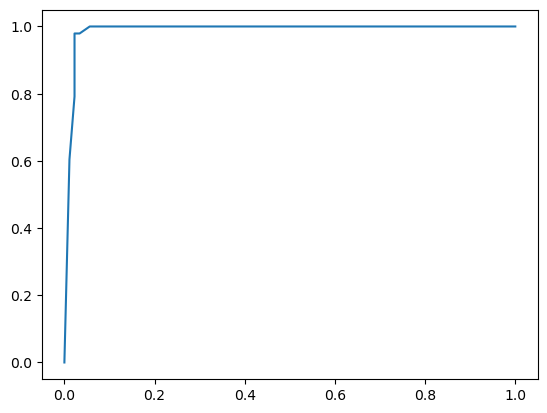

In [58]:
plt.plot(fpr,tpr)